In [72]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix



class_names = ['hypoechoic','hypercoic','calcified']


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



In [78]:
import pandas as pd
y_pred_p='Code plaque classification/patch2classv23CCA_y_Tpred.csv'
y_true_p='Code plaque classification/patch2classv23CCA_y_Ttrue.csv'

In [79]:
df_pred= pd.read_csv(y_pred_p,header=None)
y_pred=np.vstack(df_pred.values).flatten()

df_true= pd.read_csv(y_true_p,header=None)
y_true=np.vstack(df_true.values).flatten()

Confusion matrix, without normalization
[[ 88  76   0]
 [ 36 186   0]
 [  5  51   0]]
Normalized confusion matrix
[[ 0.54  0.46  0.  ]
 [ 0.16  0.84  0.  ]
 [ 0.09  0.91  0.  ]]


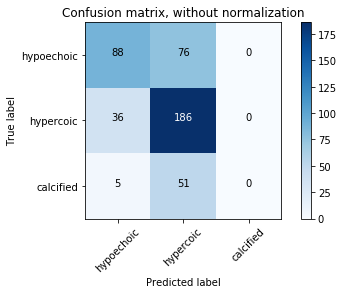

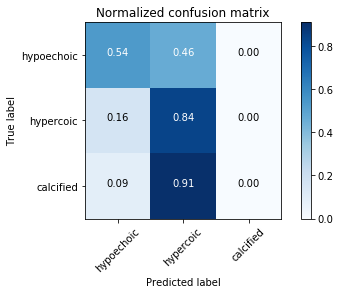

In [80]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [83]:
sum(y_true==1)/len(y_true)

0.50226244343891402

In [84]:
sum(y_true==2)/len(y_true)

0.12669683257918551

In [85]:
sum(y_true==0)/len(y_true)

0.37104072398190047